<a href="https://colab.research.google.com/github/aysesimsek/kmeans/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [2]:
from fastai import *
from fastai.vision import *
import torchvision
import torch

# LOAD DATASET

In [3]:
# Load Dataset
bs = 64
model_id = 'model-1'
tfms = []
size = 240 
def load_images(param):
    p = Path(param)
    files = []
    classes = []
    for subdir in p.ls():
        for fn in subdir.glob('*.jpg'):
            files.append(fn)
            classes.append(subdir.name)

    return ImageDataBunch.from_lists(param, files, classes, ds_tfms=tfms, bs=bs, size=size)

In [4]:
data = load_images('/content/drive/MyDrive/sample/Train') #Train data set path.

In [5]:
print(len(data.classes), data.classes)

9 ['PlayingCello', 'PlayingDaf', 'PlayingDhol', 'PlayingFlute', 'PlayingGuitar', 'PlayingPiano', 'PlayingSitar', 'PlayingTabla', 'PlayingViolin']


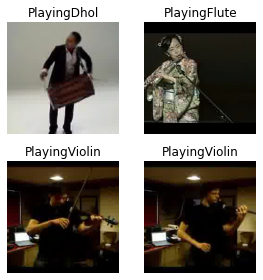

In [10]:
data.show_batch(rows=2, figsize=(4, 4), dpi = 60)

# TRAIN FINAL LAYER

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


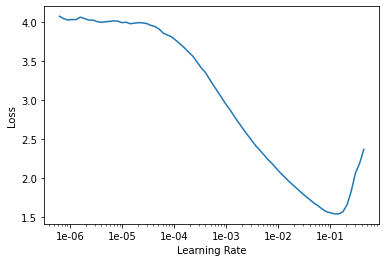

In [13]:
learn.recorder.plot()

In [7]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.468819,0.013813,0.004167,0.995833,22:56
1,0.088723,0.005426,0.000694,0.999306,00:53
2,0.021530,0.001666,0.000000,1.000000,00:53
3,0.006761,0.001395,0.000000,1.000000,00:52


In [8]:
learn.save("model-stage1")

# TRAIN ALL LAYERS

In [9]:
#learn.load('model-stage-1')
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


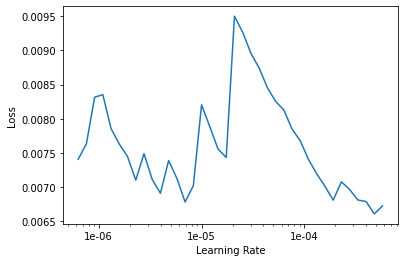

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(4, slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.003919,0.001306,0.000000,1.000000,01:11
1,0.003723,0.001390,0.000000,1.000000,01:10
2,0.002563,0.001163,0.000000,1.000000,01:11
3,0.001565,0.001198,0.000000,1.000000,01:11


In [12]:
learn.save("model-stage2")
learn.export()

In [ ]:
#learn = learn.load("/content/drive/MyDrive/sample/Train/models/model-stage2")

In [13]:
model = learn.model.eval()

In [14]:
torch.save(model, 'resnet50.pth', _use_new_zipfile_serialization=False)

# Conversion of Model to Onnx

In [19]:
model = torch.load('/content/drive/MyDrive/sample/Train/models/resnet50.pth')

In [20]:
model = model.eval().cpu()

In [15]:
dummy_input = torch.autograd.Variable(torch.randn(1, 3, 240, 240))
input_names = [ "data" ]
output_names = [ "output" ]

In [16]:
dummy_input = torch.randn(1, 3, 240, 240)
input_names = [ "actual_input_1" ] + [ "learned_%d" % i for i in range(16) ]
output_names = [ "output1" ]

In [ ]:
torch.onnx.export(model, dummy_input, "/content/drive/MyDrive/sample/Train/models/resnet50.onnx", verbose=True, input_names=input_names, output_names=output_names)